<a href="https://colab.research.google.com/github/Taifalq3/ML_Portfolio/blob/main/NLP_Sentiment_Analysis_Project_Taif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import os

# The `tpu` argument is for Colab-only, set the resolver to TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
# With this code, 8 TPU cores are allocated, to take advantage of the speed of TPU cores

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [3]:
# import tensorflow as tf
# print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

In [4]:
strategy = tf.distribute.TPUStrategy(resolver)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")

In [8]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

 "Unnamed:_0" column contains completely unique values and contains the same information as the index.

"clothing_id" columns has unique values over 1200. I'm dropping this columns because they won't work for us as they stand.

In [9]:
df.drop(['Unnamed: 0', 'Clothing ID'],axis = 1, inplace=True)
df.head()

Age                    Title  \
0   33                      NaN   
1   34                      NaN   
2   60  Some major design flaws   
3   50         My favorite buy!   
4   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

### Data Wrangling

In [10]:
df.shape

(23486, 9)

In [11]:
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [12]:
df["Recommended IND"].unique()

array([1, 0])

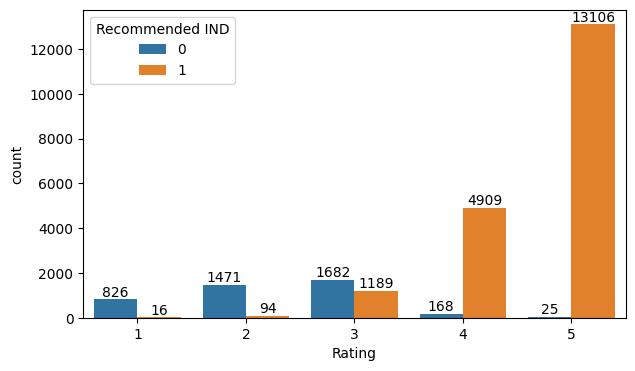

In [13]:
#a visual representation of how ratings are distributed across different recommendations,
# making it easier to interpret the relationships between these variables.
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [14]:
df[(df["Rating"] == 1) & (df["Recommended IND"] == 1)].shape

(16, 9)

In [15]:
df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))].shape

(23470, 9)

In [16]:
#here we are  filtering the DataFrame (df) to exclude specific rows based on certain
#conditions --> removing rows where there is a mismatch between the "Rating" and
#"Recommended IND" columns,to clean or preprocess the data for analysis or modeling.

#Exclude rows where the rating is 1 and the recommendation is 1:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
#Exclude rows where the rating is 2 and the recommendation is 1:
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
#Exclude rows where the rating is 3 and the recommendation is 1:
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
#Exclude rows where the rating is 4 and the recommendation is 0:
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
#Exclude rows where the rating is 5 and the recommendation is 0:
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

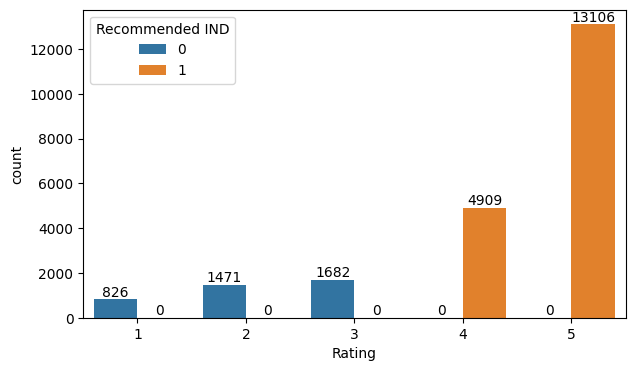

In [17]:
plt.figure(figsize = (7,4))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [18]:
df.describe().T

count       mean        std   min   25%   50%  \
Age                      21994.0  43.216013  12.285411  18.0  34.0  41.0   
Rating                   21994.0   4.272984   1.097009   1.0   4.0   5.0   
Recommended IND          21994.0   0.819087   0.384955   0.0   1.0   1.0   
Positive Feedback Count  21994.0   2.516732   5.682519   0.0   0.0   1.0   

                          75%    max  
Age                      52.0   99.0  
Rating                    5.0    5.0  
Recommended IND           1.0    1.0  
Positive Feedback Count   3.0  117.0

In [19]:
#Columns with ordinal information, although the "rating" and "recommended_ind" columns are encoded as numeric.
df.describe(include=object).T

count unique  \
Title            18402  13020   
Review Text      21175  21168   
Division Name    21980      3   
Department Name  21980      6   
Class Name       21980     20   

                                                               top   freq  
Title                                                     Love it!    135  
Review Text      Perfect fit and i've gotten so many compliment...      3  
Division Name                                              General  12923  
Department Name                                               Tops   9831  
Class Name                                                 Dresses   5856

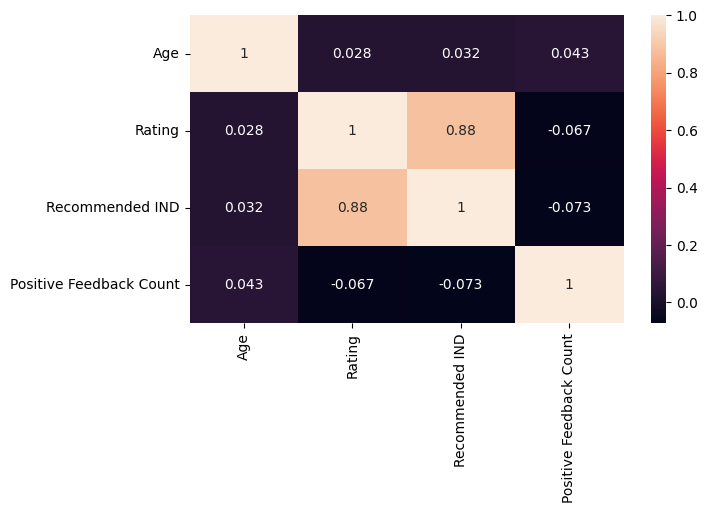

In [20]:
sns.heatmap(df.corr(), annot=True);

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

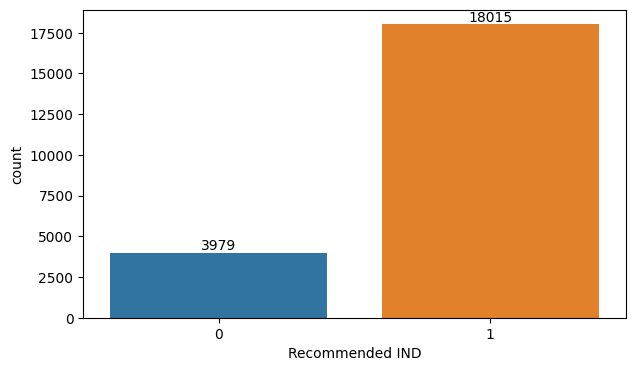

In [21]:
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

#visualizing the number of the classes using countplot.

1    18015
0     3979
Name: Recommended IND, dtype: int64


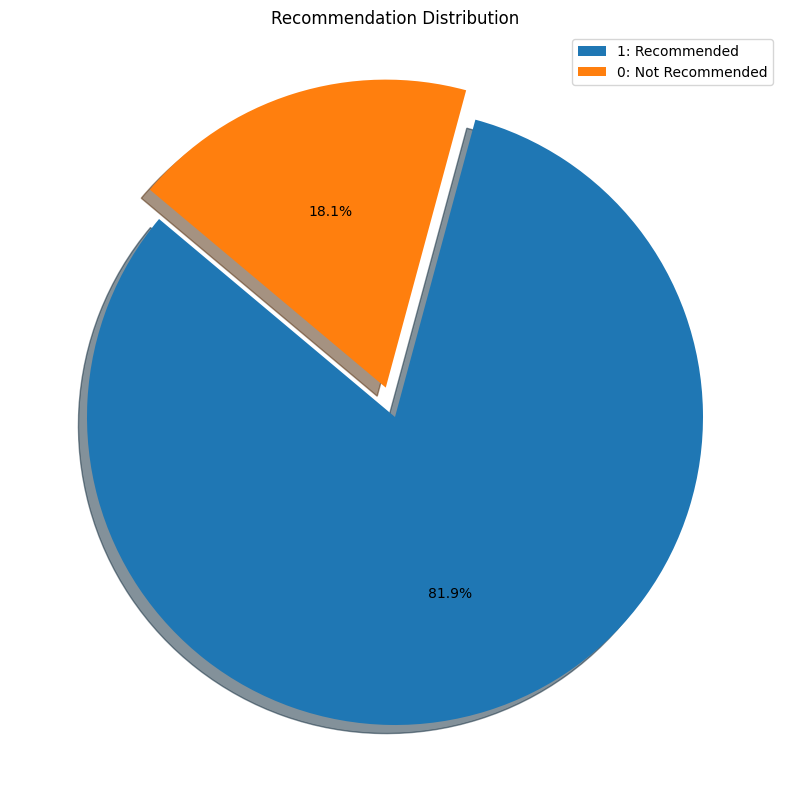

In [22]:
# Recommended IND: Binary variable stating whether the customer recommends the product, where 1 is recommended, 0 is not recommended.
print(df['Recommended IND'].value_counts())

plt.figure(figsize=(10, 10))

explode = [0, 0.1]
plt.pie(df['Recommended IND'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['1: Recommended', '0: Not Recommended'])
plt.title('Recommendation Distribution')
plt.axis('off');


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [23]:
df_ml = df.copy()

In [24]:
drop_columns = ['Age',
                'Title',
                'Rating',
                'Positive Feedback Count',
                'Division Name',
                'Department Name',
                'Class Name']

In [25]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [26]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21994 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Review Text      21175 non-null  object
 1   Recommended IND  21994 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 515.5+ KB


In [27]:
df_ml.rename(columns ={'Review Text':'text', 'Recommended IND':'recommend'}, inplace = True)

In [28]:
df_ml.columns

Index(['text', 'recommend'], dtype='object')

---
---


### Missing Value Detection

In [29]:
df_ml.isna().sum()

text         819
recommend      0
dtype: int64

In [30]:
df_ml.dropna(inplace=True)
df_ml.reset_index(drop=True, inplace=True)

In [31]:
df_ml.isna().sum()

text         0
recommend    0
dtype: int64

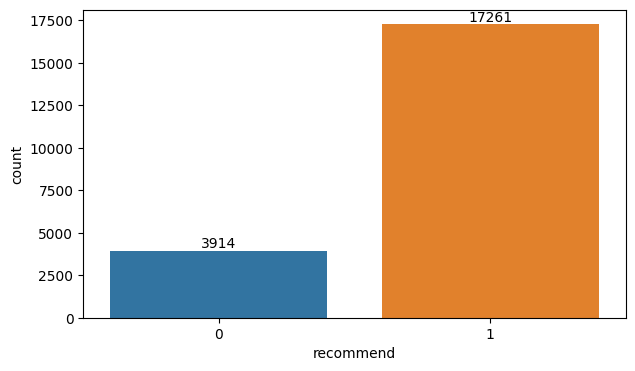

In [32]:
ax = sns.countplot(data =df_ml, x = "recommend")
ax.bar_label(ax.containers[0]);

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [33]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [34]:
def cleaning(data):

    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())

    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]

    #5. joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [35]:
neg_sentences = df_ml[df_ml["recommend"] == 0]["text"]
neg_sentences = neg_sentences.apply(cleaning)
neg_sentences.head()

2     high hope dress really wanted work initially o...
5     love tracy reese dress one not petite foot tal...
10    dress run small esp zipper area run ordered sp...
20    first not pullover styling side zipper wouldnt...
22    loved material didnt really look long dress pu...
Name: text, dtype: object

In [36]:
pos_sentences = df_ml[df_ml["recommend"] == 1]["text"]
pos_sentences = pos_sentences.apply(cleaning)
pos_sentences.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
6    aded basket hte last mintue see would look lik...
Name: text, dtype: object

### Collect Words (positive and negative separately)

In [37]:
negative_words = " ".join(neg_sentences).split()
negative_words

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'not',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'not',
 'stranger',
 'alteration',
 'shortening',
 'narrowing',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'not',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',


In [38]:
positive_words =" ".join(pos_sentences).split()
positive_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'aded',
 'basket',
 'hte',
 'last',
 'mintue',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'darkler',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'mathced',
 'everythiing',
 'trying',
 'prefectly',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'msal

In [39]:
len(negative_words)

115402

In [40]:
len(positive_words)

492037

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [41]:
from wordcloud import WordCloud

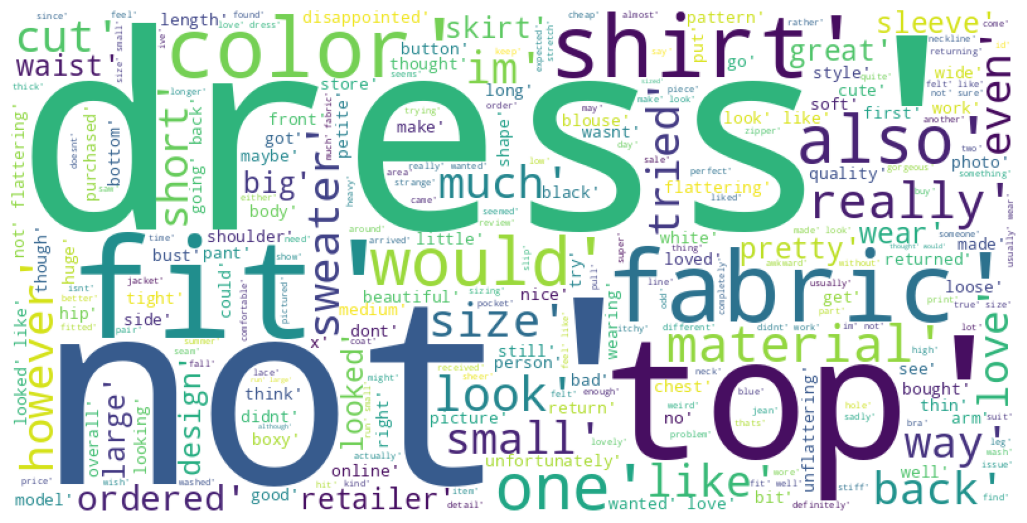

In [42]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

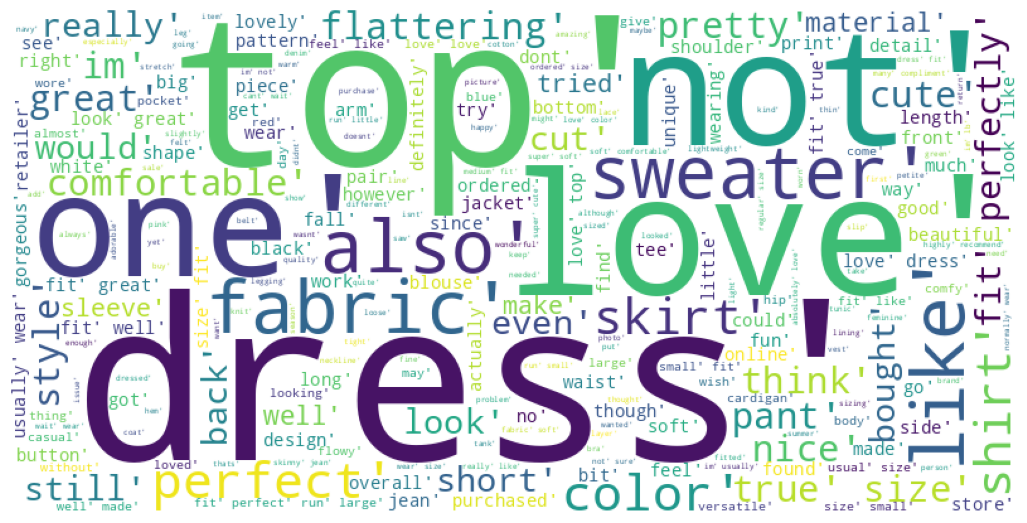

In [43]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df_ml["text"].values
y = df_ml["recommend"].map({0:1, 1:0}).values

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
vectorizer = CountVectorizer(preprocessor=cleaning,
                             min_df=3,
                             max_df=0.90)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [49]:
X_train_count

<16940x4758 sparse matrix of type '<class 'numpy.int64'>'
	with 433654 stored elements in Compressed Sparse Row format>

In [50]:
X_test_count

<4235x4758 sparse matrix of type '<class 'numpy.int64'>'
	with 106795 stored elements in Compressed Sparse Row format>

In [51]:
len(X_train_count.toarray())

16940

In [52]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
len(X_test_count.toarray())

4235

In [54]:
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aa  ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0       0   0     0        0        0     0    0         0           0   
1       0   0     0        0        0     0    0         0           0   
2       0   0     0        0        0     0    0         0           0   
3       0   0     0        0        0     0    0         0           0   
4       0   0     0        0        0     0    0         0           0   
...    ..  ..   ...      ...      ...   ...  ...       ...         ...   
16935   0   0     0        0        0     0    0         0           0   
16936   0   0     0        0        0     0    0         0           0   
16937   0   0     0        0        0     0    0         0           0   
16938   0   0     0        0        0     0    0         0           0   
16939   0   0     0        0        0     0    0         0           0   

       abstract  absurd  abt  ac  accent  accented  accentuate  accentuated  \
0             0       0    0   0       0         0           0            0   
1             0       0    0   0       0         0           0            0   
2             0       0    0   0       0         0           0            0   
3             0       0    0   0       0         0           0            0   
4             0       0    0   0       0         0           0            0   
...         ...     ...  ...  ..     ...       ...         ...          ...   
16935         0       0    0   0       0         0           0            0   
16936         0       0    0   0       0         0           0            0   
16937         0       0    0   0       0         0           0            0   
16938         0       0    0   0       0         0           0            0   
16939         0       0    0   0       0         0           0            0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0                0             0       0           0       0            0   
1                0             0       0           0       0            0   
2                0             0       0           0       0            0   
3                0             0       0           0       0            0   
4                0             0       0           0       0            0   
...            ...           ...     ...         ...     ...          ...   
16935            0             0       0           0       0            0   
16936            0             0       0           0       0            0   
16937            0             0       0           0       0            0   
16938            0             0       0           0       0            0   
16939            0             0       0           0       0            0   

       accessorized  accessorizing  ...  yet  yikes  yo  yoga  yoke  york  \
0                 0              0  ...    0      0   0     0     0     0   
1                 0              0  ...    0      0   0     0     0     0   
2                 0              0  ...    0      0   0     0     0     0   
3                 0              0  ...    0      0   0     0     0     0   
4                 0              0  ...    0      0   0     0     0     0   
...             ...            ...  ...  ...    ...  ..   ...   ...   ...   
16935             0              0  ...    0      0   0     0     0     0   
16936             0              0  ...    0      0   0     0     0     0   
16937             0              0  ...    1      0   0     0     0     0   
16938             0              0  ...    0      0   0     0     0     0   
16939             0              0  ...    0      0   0     0     0     0   

       youd  youll  young  younger  youre  youthful  youve  yr  yuck  yucky  \
0         0      0      0        0      0         0      0   0     0      0   
1         0      0      0        0      0         0      0   0     0      0   
2         0      0      0        0      0         0      0   0     0      0   
3  

### TF-IDF

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,
                             min_df=3,
                             max_df=0.90)

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [58]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aa   ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
0      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
1      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
2      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
3      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
4      0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
...    ...  ...   ...      ...      ...   ...  ...       ...         ...   
16935  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
16936  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
16937  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
16938  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
16939  0.0  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   

       abstract  absurd  abt   ac  accent  accented  accentuate  accentuated  \
0           0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
1           0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
2           0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
3           0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
4           0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
...         ...     ...  ...  ...     ...       ...         ...          ...   
16935       0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
16936       0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
16937       0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
16938       0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   
16939       0.0     0.0  0.0  0.0     0.0       0.0         0.0          0.0   

       accentuates  accentuating  accept  acceptable  access  accessorize  \
0              0.0           0.0     0.0         0.0     0.0          0.0   
1              0.0           0.0     0.0         0.0     0.0          0.0   
2              0.0           0.0     0.0         0.0     0.0          0.0   
3              0.0           0.0     0.0         0.0     0.0          0.0   
4              0.0           0.0     0.0         0.0     0.0          0.0   
...            ...           ...     ...         ...     ...          ...   
16935          0.0           0.0     0.0         0.0     0.0          0.0   
16936          0.0           0.0     0.0         0.0     0.0          0.0   
16937          0.0           0.0     0.0         0.0     0.0          0.0   
16938          0.0           0.0     0.0         0.0     0.0          0.0   
16939          0.0           0.0     0.0         0.0     0.0          0.0   

       accessorized  accessorizing  ...       yet  yikes   yo  yoga  yoke  \
0               0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
1               0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
2               0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
3               0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
4               0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
...             ...            ...  ...       ...    ...  ...   ...   ...   
16935           0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
16936           0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
16937           0.0            0.0  ...  0.265276    0.0  0.0   0.0   0.0   
16938           0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   
16939           0.0            0.0  ...  0.000000    0.0  0.0   0.0   0.0   

       york  youd  youll  young  younger  youre  youthful  youve   yr  yuck  \
0       0.0   0.0    0.0    0.0      0.0    0.0       0.0    0.0  0.0   0.0   
1       0.0   0.0    0.0    0.0      0.0    0.0       0.0    0.0  0.0   0.0   
2       0.0   0.0    0.0    0.0      0.0    0.0

### Eval Function

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [61]:
#!apt install plot_confusion_matrix
#!pip install --upgrade scikit-learn

In [62]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    #plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

## Logistic Regression

### CountVectorizer

In [63]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [64]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

LogReg_Count Model
------------------
[[3079  373]
 [ 103  680]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3452
           1       0.65      0.87      0.74       783

    accuracy                           0.89      4235
   macro avg       0.81      0.88      0.83      4235
weighted avg       0.91      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13809
           1       0.71      0.94      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.85      0.93      0.88     16940
weighted avg       0.94      0.92      0.92     16940



In [65]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.890732
train_accuracy     0.920051
test_f1            0.743557
train_f1           0.813583
test_recall        0.856915
train_recall       0.943894
test_precision     0.656820
train_precision    0.714891
dtype: float64

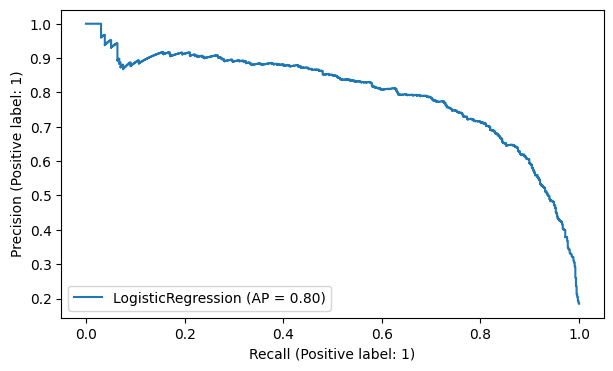

In [66]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

PrecisionRecallDisplay.from_estimator(logreg_count,
                                      X_test_count,
                                      y_test);

# PrecisionRecallDisplay.from_prediction(y_test, y_pred);

In [67]:
y_pred = logreg_count.predict(X_test_count)
y_pred_proba= logreg_count.predict_proba(X_test_count)[:,1]

log_AP_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

In [68]:
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP_count)

LogReg_Count_rec :  0.8684546615581098
LogReg_Count_f1  :  0.7407407407407408
LogReg_Count_AP  :  0.7984102287848641


### TF-IDF

In [69]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [70]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

LogReg_TFIDF Model
------------------
[[3073  379]
 [  99  684]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3452
           1       0.64      0.87      0.74       783

    accuracy                           0.89      4235
   macro avg       0.81      0.88      0.83      4235
weighted avg       0.91      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13809
           1       0.70      0.94      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.84      0.93      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [71]:
model = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.891027
train_accuracy     0.917336
test_f1            0.747755
train_f1           0.808905
test_recall        0.873528
train_recall       0.946591
test_precision     0.653891
train_precision    0.706189
dtype: float64

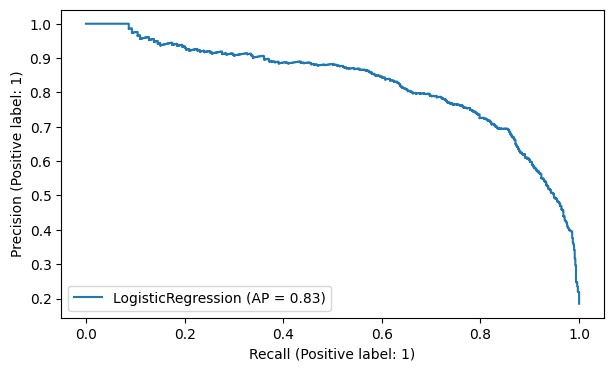

In [72]:
PrecisionRecallDisplay.from_estimator(logreg_tfidf,
                                      X_test_tf_idf,
                                      y_test);

In [73]:
y_pred = logreg_tfidf.predict(X_test_tf_idf)
y_pred_proba= logreg_tfidf.predict_proba(X_test_tf_idf)[:,1]


log_AP_tfidf = average_precision_score(y_test, y_pred_proba)
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

In [74]:
print("LogReg_TFIDF_rec : ", log_tfidf_rec)
print("LogReg_TFIDF_f1  : ", log_tfidf_f1)
print("LogReg_TFIDF_AP  : ", log_AP_tfidf)

LogReg_TFIDF_rec :  0.8735632183908046
LogReg_TFIDF_f1  :  0.7410617551462623
LogReg_TFIDF_AP  :  0.8251901598492538


## Naive Bayes

### Countvectorizer MultinomialNB

In [75]:
from sklearn.naive_bayes import MultinomialNB

In [76]:
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count,y_train)

MultinomialNB()

In [77]:
print("NBMulti_Count Model")
print("-------------------")
eval(nbmulti_count, X_train_count, X_test_count)

NBMulti_Count Model
-------------------
[[3221  231]
 [ 158  625]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.73      0.80      0.76       783

    accuracy                           0.91      4235
   macro avg       0.84      0.87      0.85      4235
weighted avg       0.91      0.91      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.76      0.85      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.90      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [78]:
model = MultinomialNB()
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.903542
train_accuracy     0.923383
test_f1            0.753560
train_f1           0.804728
test_recall        0.797509
train_recall       0.854147
test_precision     0.714491
train_precision    0.760722
dtype: float64

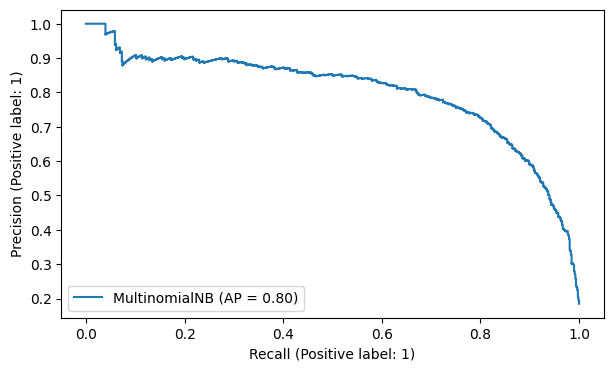

In [79]:
PrecisionRecallDisplay.from_estimator(nbmulti_count,
                                      X_test_count,
                                      y_test);

In [80]:
y_pred = nbmulti_count.predict(X_test_count)
y_pred_proba= nbmulti_count.predict_proba(X_test_count)[:,1]

nb_AP_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

In [81]:
print("NBMulti_Count_rec : ", nb_count_rec)
print("NBMulti_Count_f1: ", nb_count_f1)
print("NBMulti_Count_AP  : ", nb_AP_count)

NBMulti_Count_rec :  0.7982120051085568
NBMulti_Count_f1:  0.762660158633313
NBMulti_Count_AP  :  0.8008417565829553


### Countvectorizer BernoulliNB

In [82]:
from sklearn.naive_bayes import BernoulliNB

In [83]:
nbberno_count = BernoulliNB()
nbberno_count.fit(X_train_count,y_train)

BernoulliNB()

In [84]:
print("NBBerno_Count Model")
print("-------------------")
eval(nbberno_count, X_train_count, X_test_count)

NBBerno_Count Model
-------------------
[[3212  240]
 [ 187  596]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3452
           1       0.71      0.76      0.74       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.74      0.83      0.78      3131

    accuracy                           0.92     16940
   macro avg       0.85      0.88      0.87     16940
weighted avg       0.92      0.92      0.92     16940



In [85]:
model = BernoulliNB()
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.897462
train_accuracy     0.916824
test_f1            0.735607
train_f1           0.786037
test_recall        0.771645
train_recall       0.826608
test_precision     0.702982
train_precision    0.749265
dtype: float64

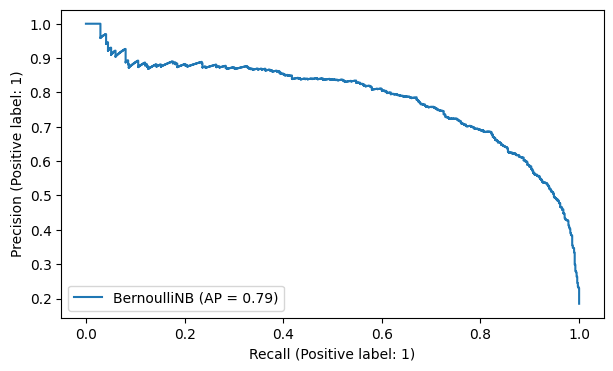

In [86]:
PrecisionRecallDisplay.from_estimator(nbberno_count,
                                      X_test_count,
                                      y_test);

In [88]:
y_pred = nbberno_count.predict(X_test_count)
y_pred_proba= nbberno_count.predict_proba(X_test_count)[:,1]

nb_ber_count_AP = average_precision_score(y_test, y_pred_proba)
nb_ber_count_rec = recall_score(y_test, y_pred)
nb_ber_count_f1 = f1_score(y_test,y_pred)

In [89]:
print("NBBerno_Count_rec : ", nb_ber_count_rec)
print("NBBerno_Count_f1  : ", nb_ber_count_f1)
print("NBBerno_Count_AP  : ", nb_ber_count_AP)

NBBerno_Count_rec :  0.7611749680715197
NBBerno_Count_f1  :  0.7362569487337862
NBBerno_Count_AP  :  0.7858968406806128


### TF-IDF  MultinomialNB

In [90]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [91]:
print("NBMulti_TFIDF MODEL")
print("-------------------")
eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)

NBMulti_TFIDF MODEL
-------------------
[[3440   12]
 [ 593  190]]
Test_Set
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3452
           1       0.94      0.24      0.39       783

    accuracy                           0.86      4235
   macro avg       0.90      0.62      0.65      4235
weighted avg       0.87      0.86      0.82      4235

Train_Set
              precision    recall  f1-score   support

           0       0.86      1.00      0.93     13809
           1       0.97      0.31      0.47      3131

    accuracy                           0.87     16940
   macro avg       0.92      0.65      0.70     16940
weighted avg       0.88      0.87      0.84     16940



In [92]:
model = MultinomialNB()
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.855313
train_accuracy     0.867703
test_f1            0.370412
train_f1           0.451107
test_recall        0.230916
train_recall       0.294155
test_precision     0.943182
train_precision    0.967314
dtype: float64

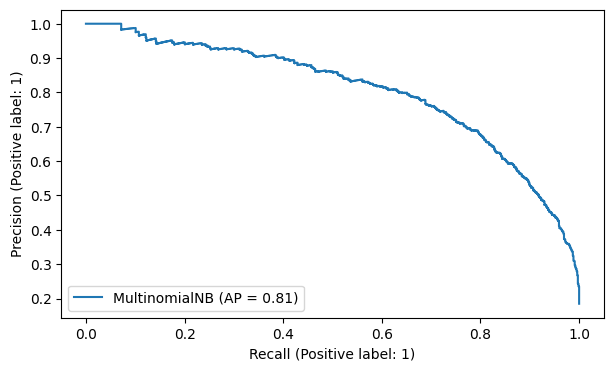

In [93]:
PrecisionRecallDisplay.from_estimator(nbmulti_tfidf,
                                      X_test_tf_idf,
                                      y_test);

In [94]:
y_pred = nbmulti_tfidf.predict(X_test_tf_idf)
y_pred_proba= nbmulti_tfidf.predict_proba(X_test_tf_idf)[:,1]


nb_multi_tf_idf_AP = average_precision_score(y_test, y_pred_proba)
nb_multi_tf_idf_rec = recall_score(y_test, y_pred)
nb_multi_tf_idf_f1 = f1_score(y_test,y_pred)

In [95]:
print("NBMulti_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBMulti_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBMulti_TFIDF_AP  : ", nb_multi_tf_idf_AP)

NBMulti_TFIDF_rec :  0.24265644955300128
NBMulti_TFIDF_f1  :  0.3857868020304569
NBMulti_TFIDF_AP  :  0.8050037234188099


### TF-IDF  BernoulliNB

In [96]:
nbberno_tfidf = BernoulliNB()
nbberno_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [97]:
print("NBBerno_TFIDF MODEL")
print("-------------------")
eval(nbberno_tfidf, X_train_tf_idf, X_test_tf_idf)

NBBerno_TFIDF MODEL
-------------------
[[3212  240]
 [ 187  596]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      3452
           1       0.71      0.76      0.74       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     13809
           1       0.74      0.83      0.78      3131

    accuracy                           0.92     16940
   macro avg       0.85      0.88      0.87     16940
weighted avg       0.92      0.92      0.92     16940



In [98]:
model = BernoulliNB()
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy      0.897462
train_accuracy     0.916824
test_f1            0.735607
train_f1           0.786037
test_recall        0.771645
train_recall       0.826608
test_precision     0.702982
train_precision    0.749265
dtype: float64

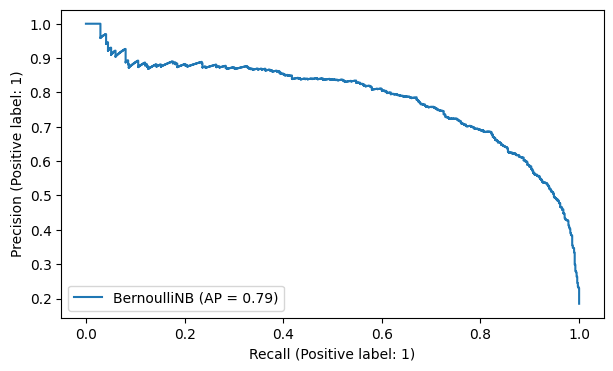

In [99]:
PrecisionRecallDisplay.from_estimator(nbberno_tfidf,
                                      X_test_tf_idf,
                                      y_test);

In [100]:
y_pred = nbberno_tfidf.predict(X_test_tf_idf)
y_pred_proba= nbberno_tfidf.predict_proba(X_test_tf_idf)[:,1]


nb_ber_tf_idf_AP = average_precision_score(y_test, y_pred_proba)
nb_ber_tf_idf_rec = recall_score(y_test, y_pred)
nb_ber_tf_idf_f1 = f1_score(y_test,y_pred)

In [101]:
print("NBBerno_TFIDF_rec : ", nb_ber_tf_idf_rec)
print("NBBerno_TFIDF_f1  : ", nb_ber_tf_idf_f1)
print("NBBerno_TFIDF_AP  : ", nb_ber_tf_idf_AP)

NBBerno_TFIDF_rec :  0.7611749680715197
NBBerno_TFIDF_f1  :  0.7362569487337862
NBBerno_TFIDF_AP  :  0.7858968406806128


## Support Vector Machine (SVM)

### Countvectorizer

In [102]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_count.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [103]:
print("SVC_Count Model")
print("---------------")
eval(svc_count, X_train_count, X_test_count)

SVC_Count Model
---------------
[[3081  371]
 [ 109  674]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3452
           1       0.64      0.86      0.74       783

    accuracy                           0.89      4235
   macro avg       0.81      0.88      0.83      4235
weighted avg       0.91      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13809
           1       0.71      0.94      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.85      0.93      0.88     16940
weighted avg       0.94      0.92      0.92     16940



In [104]:
model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.891617
train_accuracy     0.921501
test_f1            0.745616
train_f1           0.816749
test_recall        0.859151
train_recall       0.946450
test_precision     0.658761
train_precision    0.718317
dtype: float64

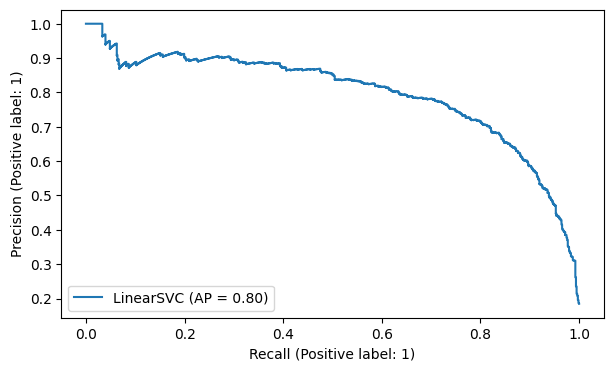

In [105]:
PrecisionRecallDisplay.from_estimator(svc_count,
                                      X_test_count,
                                      y_test);

In [106]:
y_pred = svc_count.predict(X_test_count)
decision_function= svc_count.decision_function(X_test_count)

svc_AP_count = average_precision_score(y_test, decision_function)
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

In [107]:
print("SVC_Count_rec : ", svc_count_rec)
print("SVC_Count_f1  : ", svc_count_f1)
print("SVC_Count_AP  : ", svc_AP_count)

SVC_Count_rec :  0.8607918263090677
SVC_Count_f1  :  0.737417943107221
SVC_Count_AP  :  0.7971159981329653


### TD-IDF

In [108]:
svc_tf_idf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
svc_tf_idf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [109]:
print("SVC_TFIDF Model")
print("---------------")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

SVC_TFIDF Model
---------------
[[2973  479]
 [  95  688]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3452
           1       0.59      0.88      0.71       783

    accuracy                           0.86      4235
   macro avg       0.78      0.87      0.81      4235
weighted avg       0.90      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     13809
           1       0.62      0.92      0.74      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.90      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [110]:
model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.870071
train_accuracy     0.881267
test_f1            0.715765
train_f1           0.740818
test_recall        0.884384
train_recall       0.918060
test_precision     0.601310
train_precision    0.620943
dtype: float64

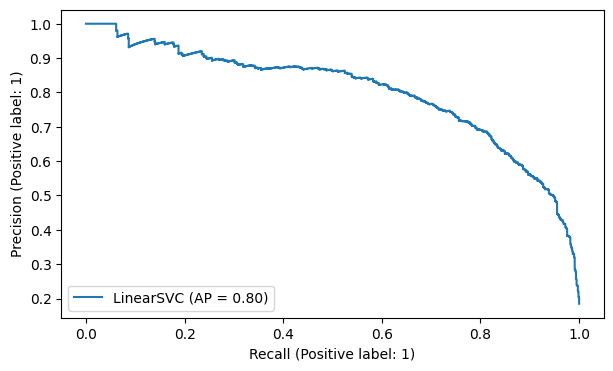

In [111]:
PrecisionRecallDisplay.from_estimator(svc_tf_idf,
                                      X_test_tf_idf,
                                      y_test);

In [112]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
decision_function= svc_tf_idf.decision_function(X_test_tf_idf)

svc_AP_tfidf = average_precision_score(y_test, decision_function)
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

In [113]:
print("SVC_TFIDF_rec   : ", svc_tfidf_rec)
print("SVC_TFIDF_f1   : ", svc_tfidf_f1)
print("SVC_TFIDF_AP   : ", svc_AP_tfidf)

SVC_TFIDF_rec   :  0.8786717752234994
SVC_TFIDF_f1   :  0.7056410256410256
SVC_TFIDF_AP   :  0.8028365292979435


## Random Forest

### Countvectorizer

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

In [115]:
print("RF_Count Model")
print("--------------")
eval(rf_count, X_train_count, X_test_count)

RF_Count Model
--------------
[[3039  413]
 [ 133  650]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3452
           1       0.61      0.83      0.70       783

    accuracy                           0.87      4235
   macro avg       0.78      0.86      0.81      4235
weighted avg       0.89      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     13809
           1       0.68      0.90      0.78      3131

    accuracy                           0.90     16940
   macro avg       0.83      0.90      0.86     16940
weighted avg       0.92      0.90      0.91     16940



In [116]:
model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.869126
train_accuracy     0.905142
test_f1            0.696369
train_f1           0.778327
test_recall        0.811238
train_recall       0.900919
test_precision     0.610191
train_precision    0.685138
dtype: float64

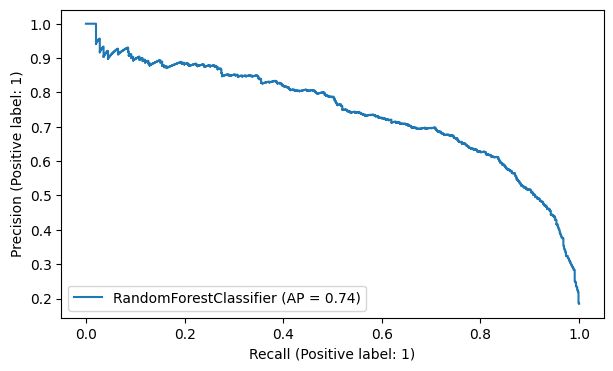

In [117]:
PrecisionRecallDisplay.from_estimator(rf_count,
                                      X_test_count,
                                      y_test);

In [118]:
y_pred = rf_count.predict(X_test_count)
y_pred_proba= rf_count.predict_proba(X_test_count)[:,1]

rf_AP_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

In [119]:
print("RF_Count_rec : ", rf_count_rec)
print("RF_Count_f1  : ", rf_count_f1)
print("RF_Count_AP  : ", rf_AP_count)

RF_Count_rec :  0.8301404853128991
RF_Count_f1  :  0.704225352112676
RF_Count_AP  :  0.7435767306521268


### TF-IDF

In [120]:
rf_tf_idf = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11, n_estimators=200,
                       n_jobs=-1, random_state=101)

In [121]:
print("RF_TFIDF Model")
print("--------------")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

RF_TFIDF Model
--------------
[[3010  442]
 [ 130  653]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3452
           1       0.60      0.83      0.70       783

    accuracy                           0.86      4235
   macro avg       0.78      0.85      0.80      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     13809
           1       0.67      0.91      0.77      3131

    accuracy                           0.90     16940
   macro avg       0.82      0.91      0.85     16940
weighted avg       0.92      0.90      0.91     16940



In [122]:
model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.866175
train_accuracy     0.903555
test_f1            0.692266
train_f1           0.778123
test_recall        0.814430
train_recall       0.914724
test_precision     0.602033
train_precision    0.677096
dtype: float64

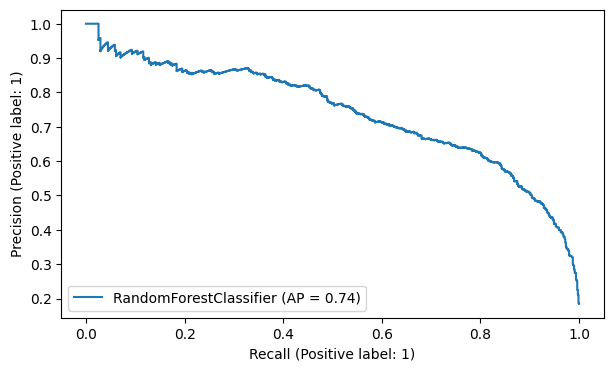

In [123]:
PrecisionRecallDisplay.from_estimator(rf_tf_idf,
                                      X_test_tf_idf,
                                      y_test);

In [124]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
y_pred_proba= rf_tf_idf.predict_proba(X_test_tf_idf)[:,1]

rf_AP_tfidf = average_precision_score(y_test, y_pred_proba)
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

In [125]:
print("RF_TFIDF_rec : ", rf_tfidf_rec)
print("RF_TFIDF_f1  : ", rf_tfidf_f1)
print("RF_TFIDF_AP  : ", rf_AP_tfidf)

RF_TFIDF_rec :  0.8339719029374202
RF_TFIDF_f1  :  0.6954206602768903
RF_TFIDF_AP  :  0.7404359678967801


## Ada Boosting

### Countvectorizer

In [126]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

In [127]:
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

Ada_Count Model
---------------
[[3289  163]
 [ 277  506]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3452
           1       0.76      0.65      0.70       783

    accuracy                           0.90      4235
   macro avg       0.84      0.80      0.82      4235
weighted avg       0.89      0.90      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     13809
           1       0.85      0.74      0.79      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.86      0.87     16940
weighted avg       0.93      0.93      0.93     16940



In [128]:
model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.901122
train_accuracy     0.931018
test_f1            0.712649
train_f1           0.800829
test_recall        0.663369
train_recall       0.750346
test_precision     0.770330
train_precision    0.858617
dtype: float64

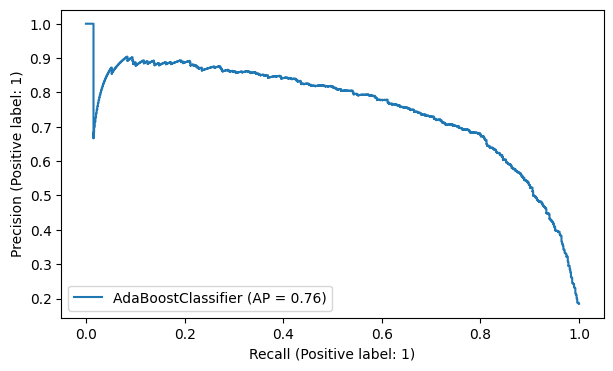

In [129]:
PrecisionRecallDisplay.from_estimator(ada_count,
                                      X_test_count,
                                      y_test);

In [130]:
y_pred = ada_count.predict(X_test_count)
y_pred_proba= ada_count.predict_proba(X_test_count)[:,1]

ada_AP_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

In [131]:
print("Ada_Count_rec : ", ada_count_rec)
print("Ada_Count_f1  : ", ada_count_f1)
print("Ada_Count_AP  : ", ada_AP_count)

Ada_Count_rec :  0.6462324393358876
Ada_Count_f1  :  0.6969696969696969
Ada_Count_AP  :  0.7561687419264989


### TF-IDF

In [132]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_tf_idf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=101)

In [133]:
print("Ada_TFIDF Model")
print("---------------")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

Ada_TFIDF Model
---------------
[[3260  192]
 [ 269  514]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3452
           1       0.73      0.66      0.69       783

    accuracy                           0.89      4235
   macro avg       0.83      0.80      0.81      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13809
           1       0.87      0.79      0.83      3131

    accuracy                           0.94     16940
   macro avg       0.91      0.88      0.90     16940
weighted avg       0.94      0.94      0.94     16940



In [134]:
model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring = scoring,
                        cv = 10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores,
                         index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.896281
train_accuracy     0.944025
test_f1            0.700053
train_f1           0.841171
test_recall        0.655070
train_recall       0.801980
test_precision     0.752253
train_precision    0.884403
dtype: float64

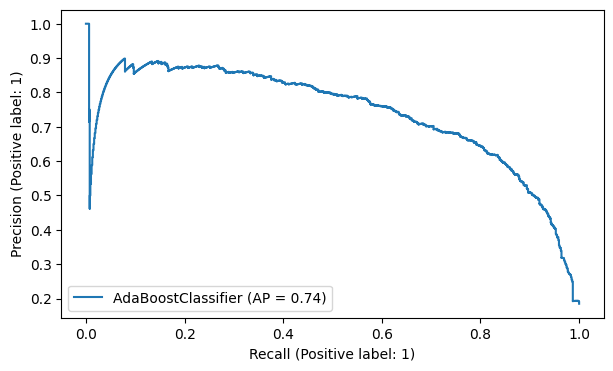

In [135]:
PrecisionRecallDisplay.from_estimator(ada_tf_idf,
                                      X_test_tf_idf,
                                      y_test);

In [136]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
y_pred_proba= ada_tf_idf.predict_proba(X_test_tf_idf)[:,1]

ada_AP_tfidf = average_precision_score(y_test, y_pred_proba)
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

In [137]:
print("Ada_TFIDF_rec : ", ada_tfidf_rec)
print("Ada_TFIDF_f1  : ", ada_tfidf_f1)
print("Ada_TFIDF_AP  : ", ada_AP_tfidf)

Ada_TFIDF_rec :  0.6564495530012772
Ada_TFIDF_f1  :  0.6903962390866353
Ada_TFIDF_AP  :  0.7387613193726277


## DL modeling

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
df_dl = pd.read_csv("/content/drive/MyDrive/Womens Clothing E-Commerce Reviews.csv")

In [140]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

Review Text  Recommended IND
0  Absolutely wonderful - silky and sexy and comf...                1
1  Love this dress!  it's sooo pretty.  i happene...                1
2  I had such high hopes for this dress and reall...                0
3  I love, love, love this jumpsuit. it's fun, fl...                1
4  This shirt is very flattering to all due to th...                1

In [141]:
df_dl.rename(columns = {'Review Text':'text', 'Recommended IND':'recommend'}, inplace = True)
df_dl.columns

Index(['text', 'recommend'], dtype='object')

In [142]:
df_dl.shape

(23486, 2)

In [143]:
df_dl.isnull().sum()

text         845
recommend      0
dtype: int64

In [144]:
df_dl = df_dl.dropna(subset = ['text'], axis = 0)
df_dl = df_dl.reset_index(drop = True)

In [145]:
df_dl.isnull().sum()

text         0
recommend    0
dtype: int64

In [146]:
df_dl.shape

(22641, 2)

In [147]:
df_dl.head()

text  recommend
0  Absolutely wonderful - silky and sexy and comf...          1
1  Love this dress!  it's sooo pretty.  i happene...          1
2  I had such high hopes for this dress and reall...          0
3  I love, love, love this jumpsuit. it's fun, fl...          1
4  This shirt is very flattering to all due to th...          1

### Tokenization

In [148]:
X = df_dl['text'].values
y = df_dl['recommend'].map({0:1, 1:0}).values

In [149]:
num_words = 10000
tokenizer = Tokenizer(num_words = num_words)

In [150]:
tokenizer.fit_on_texts(X)

### Creating word index

In [151]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [152]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [153]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [154]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [155]:
X_num_tokens

[[253, 532, 917, 3, 662, 3, 68],
 [21,
  7,
  18,
  33,
  1713,
  99,
  2,
  1322,
  8,
  221,
  5,
  9,
  4,
  106,
  3,
  36,
  314,
  2,
  131,
  1243,
  2,
  429,
  41,
  24,
  52,
  5,
  136,
  1243,
  33,
  95,
  2,
  72,
  4,
  95,
  3,
  38,
  501,
  2,
  21,
  1,
  86,
  11,
  31,
  416,
  39,
  4,
  53,
  454,
  1,
  392,
  41,
  155,
  29,
  4,
  130,
  1372,
  11,
  438,
  439,
  6,
  772,
  95],
 [2,
  65,
  312,
  178,
  1095,
  12,
  7,
  18,
  3,
  51,
  195,
  5,
  8,
  102,
  12,
  31,
  2,
  1152,
  52,
  1,
  95,
  46,
  17,
  236,
  22,
  10,
  2,
  219,
  7,
  8,
  29,
  6689,
  46,
  16,
  46,
  9,
  661,
  20,
  2,
  118,
  19,
  784,
  5,
  43,
  2,
  2147,
  5,
  9,
  95,
  97,
  82,
  15,
  39,
  637,
  250,
  1,
  25,
  656,
  15,
  68,
  3,
  26,
  258,
  10,
  1,
  175,
  656,
  65,
  4,
  23,
  148,
  272,
  475,
  3,
  527,
  718,
  489,
  4601,
  151,
  975,
  1876,
  4,
  1877,
  142,
  1589,
  15,
  1,
  4601,
  151,
  475,
  830,
  3247,
  313,
  1,


### Maximum number of tokens for all documents¶

In [156]:
num_tokens.max()

116

In [157]:
num_tokens.mean()

60.39287133960514

In [158]:
num_tokens.argmax()

16263

In [159]:
X[16263]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [160]:
num_tokens.argmin()

820

In [161]:
X[820]

'Great style!'

### Fixing token counts of all documents (pad_sequences)

In [162]:
max_tokens = 103

In [163]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.9604699439070712

In [164]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [165]:
X_pad.shape

(22641, 103)

### Train Set Split

In [166]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.2, stratify = y, random_state = 101)

### Modeling

In [168]:
model = Sequential()

In [169]:
embedding_size = 100

In [170]:
model.add(Embedding(input_dim = num_words,
                    output_dim = embedding_size,
                    input_length = max_tokens,
                    name = 'embedding_layer'))

In [171]:
model.add(Bidirectional(GRU(units = 48, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 24, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 12)))
model.add(Dense(1, activation = 'sigmoid'))

In [172]:
optimizer = Adam(lr = 0.004)

In [173]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ["Recall"])

In [174]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 103, 100)         1000000   
                                                                 
 bidirectional (Bidirectiona  (None, 103, 96)          43200     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 103, 96)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 103, 48)          17568     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 103, 48)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 24)               4

In [175]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto",
                           verbose = 1, patience = 5, restore_best_weights = True)

In [176]:
pd.Series(y_train).value_counts(normalize = True)

0    0.818849
1    0.181151
dtype: float64

In [177]:
weights = {0:19, 1:81}

In [178]:
model.fit(X_train, y_train, epochs = 10, batch_size = 256, class_weight = weights,
         validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/10
71/71 [==============================] - 34s 248ms/step - loss: 17.0014 - recall: 0.5803 - val_loss: 0.4168 - val_recall: 0.8732
Epoch 2/10
71/71 [==============================] - 14s 203ms/step - loss: 9.5182 - recall: 0.8979 - val_loss: 0.3224 - val_recall: 0.8317
Epoch 3/10
71/71 [==============================] - 14s 197ms/step - loss: 7.0464 - recall: 0.9403 - val_loss: 0.3708 - val_recall: 0.8341
Epoch 4/10
71/71 [==============================] - 14s 196ms/step - loss: 5.5506 - recall: 0.9598 - val_loss: 0.3840 - val_recall: 0.8134
Epoch 5/10
71/71 [==============================] - 14s 196ms/step - loss: 4.9435 - recall: 0.9628 - val_loss: 0.3550 - val_recall: 0.7488
Epoch 6/10
71/71 [==============================] - 14s 197ms/step - loss: 4.0903 - recall: 0.9741 - val_loss: 0.4406 - val_recall: 0.8183
Epoch 7/10
71/71 [==============================] - 14s 197ms/step - loss: 3.6314 - recall: 0.9796 - val_loss: 0.4355 - val_recall: 0.6927
Epoch 7: early stopping


### Model Evaluation

In [179]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  17.001364  0.580311  0.416763    0.873171
1   9.518231  0.897897  0.322394    0.831707
2   7.046370  0.940262  0.370764    0.834146
3   5.550642  0.959768  0.383961    0.813415
4   4.943472  0.962816  0.355017    0.748780

<Axes: >

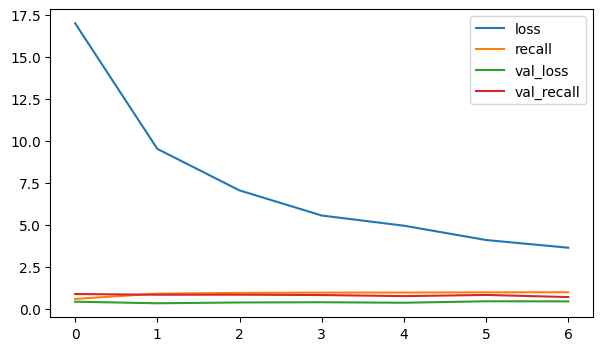

In [180]:
model_loss.plot()

In [181]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 15s 27ms/step - loss: 0.2349 - recall: 0.9482


[0.23494280874729156, 0.9481865167617798]

In [182]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 4s 25ms/step - loss: 0.3224 - recall: 0.8317


[0.32239389419555664, 0.8317072987556458]

In [183]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("---------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 14s 21ms/step
[[13370  1461]
 [  170  3111]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     14831
           1       0.68      0.95      0.79      3281

    accuracy                           0.91     18112
   macro avg       0.83      0.92      0.87     18112
weighted avg       0.93      0.91      0.92     18112



In [184]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 6s 23ms/step
[[3229  480]
 [ 138  682]]
--------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.59      0.83      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529



In [185]:
from sklearn.metrics import precision_recall_curve, average_precision_score

142/142 [==============================] - 3s 20ms/step


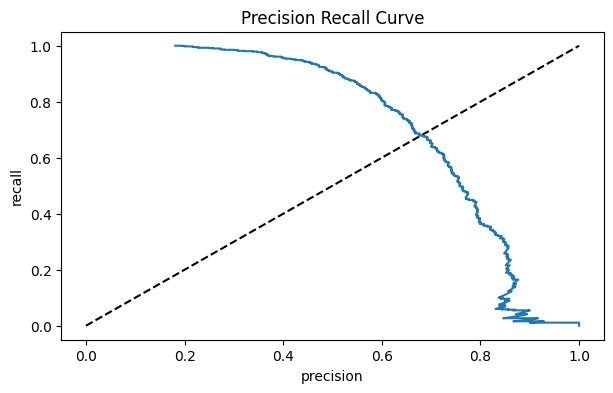

In [186]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [187]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [188]:
print("DL_AP   : ", DL_AP)
print("DL_f1   : ", DL_f1)
print("DL_rec  : ", DL_rec)

DL_AP   :  0.7245662244142065
DL_f1   :  0.688193743693239
DL_rec  :  0.8317073170731707


## BERT Modeling

In [191]:
!pip install transformers
#To use BERT models, we first need to install transformers as BERT models are built on top of transformers.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.9 MB/s eta 0:00:00


### Tokenization

In [192]:
X

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [193]:
# There are diff Bert Tokenizer, but I choose the AutoTokenizer becouse that I can spacify
# the chek points ("bert-base-uncased")
from transformers import AutoTokenizer #BertTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
num_of_sent_tokens = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)
    num_of_sent_tokens.append(len(input_ids))

print('Max sentence length: ', max(num_of_sent_tokens))

Max sentence length:  162


### Fixing token counts of all documents

In [194]:
np.array(num_of_sent_tokens).mean()

76.75659202332052

In [195]:
sum(np.array(num_of_sent_tokens) <= 162) / len(num_of_sent_tokens)

1.0

In [196]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

In [197]:
all_sentence_tokens = tokenizer(list(X),
                                max_length=162,
                                truncation=True,
                                padding='max_length',
                                add_special_tokens=True)

In [198]:
np.array(all_sentence_tokens['input_ids'])

array([[ 101, 7078, 6919, ...,    0,    0,    0],
       [ 101, 2293, 2023, ...,    0,    0,    0],
       [ 101, 1045, 2018, ...,    0,    0,    0],
       ...,
       [ 101, 2023, 4906, ...,    0,    0,    0],
       [ 101, 1045, 4149, ...,    0,    0,    0],
       [ 101, 2023, 4377, ...,    0,    0,    0]])

In [199]:
np.array(all_sentence_tokens['attention_mask'])

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

### Transformation Vectors to Matrices

In [200]:
def transformation(X):
  # set array dimensions
  seq_len = 162

  all_sentence_tokens = tokenizer(list(X),
                                  max_length=seq_len,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [201]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [202]:
Xids_train

array([[  101,  4149,  2023, ...,     0,     0,     0],
       [  101,  2023,  2327, ...,     0,     0,     0],
       [  101,  1045,  2359, ...,     0,     0,     0],
       ...,
       [  101,  5356, 13759, ...,     0,     0,     0],
       [  101,  1045,  7078, ...,     0,     0,     0],
       [  101,  1045,  4156, ...,     0,     0,     0]])

In [203]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 162)
Xmask_train.shape : (20376, 162)
Xids_test.shape   : (2265, 162)
Xmask_test.shape  : (2265, 162)


In [204]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [205]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [206]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,
                                                    Xmask_train,
                                                    labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [207]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,
                                                   Xmask_test,
                                                   labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [208]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [209]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [210]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [211]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [212]:
# fit batch_size into a batch of 32
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

### Creating optimization

In [213]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.3 MB/s eta 0:00:00


In [214]:
from official.nlp import optimization
epochs = 2
#batch_size = 32
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5  # 3e-5, 5e-5
optimizer= optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [215]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1274
127


### Creating Model with TPU

In [216]:
def create_model():
    from transformers import TFAutoModel #TFBertModel
    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [217]:
with strategy.scope():

  optimizer = optimizer #Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  precision = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [218]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

### Model Fiting

In [219]:
pd.Series(y).value_counts(normalize=True)

0    0.818868
1    0.181132
dtype: float64

In [220]:
weights = {0:0.18, 1:0.81}

In [221]:
model3.fit(train_ds, validation_data= val_ds, epochs=epochs, class_weight=weights)

Epoch 1/2
637/637 [==============================] - 225s 191ms/step - loss: 0.1404 - recall: 0.8705 - val_loss: 0.3309 - val_recall: 0.9098
Epoch 2/2
637/637 [==============================] - 69s 108ms/step - loss: 0.1080 - recall: 0.9409 - val_loss: 0.4320 - val_recall: 0.9366


### Model evaluation

In [222]:
model_loss = pd.DataFrame(model3.history.history)
model_loss.head()

loss    recall  val_loss  val_recall
0  0.140395  0.870496  0.330919    0.909756
1  0.107983  0.940937  0.431962    0.936585

<Axes: >

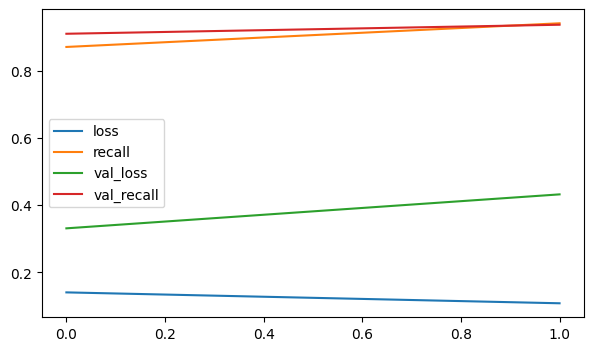

In [223]:
model_loss.plot()

In [224]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

71/71 [==============================] - 13s 101ms/step
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1855
           1       0.65      0.94      0.77       410

    accuracy                           0.90      2265
   macro avg       0.82      0.91      0.85      2265
weighted avg       0.92      0.90      0.90      2265



In [225]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred))

637/637 [==============================] - 25s 35ms/step
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     16685
           1       0.71      0.96      0.82      3691

    accuracy                           0.92     20376
   macro avg       0.85      0.94      0.88     20376
weighted avg       0.94      0.92      0.93     20376



In [226]:
y_pred_proba = model3.predict(val_ds)

average_precision_score(y_test2, y_pred_proba)

71/71 [==============================] - 4s 29ms/step


0.8433810863522829

In [227]:
BERT_AP = average_precision_score(y_test2, y_pred_proba)
BERT_f1 = f1_score(y_test2, y_pred)
BERT_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

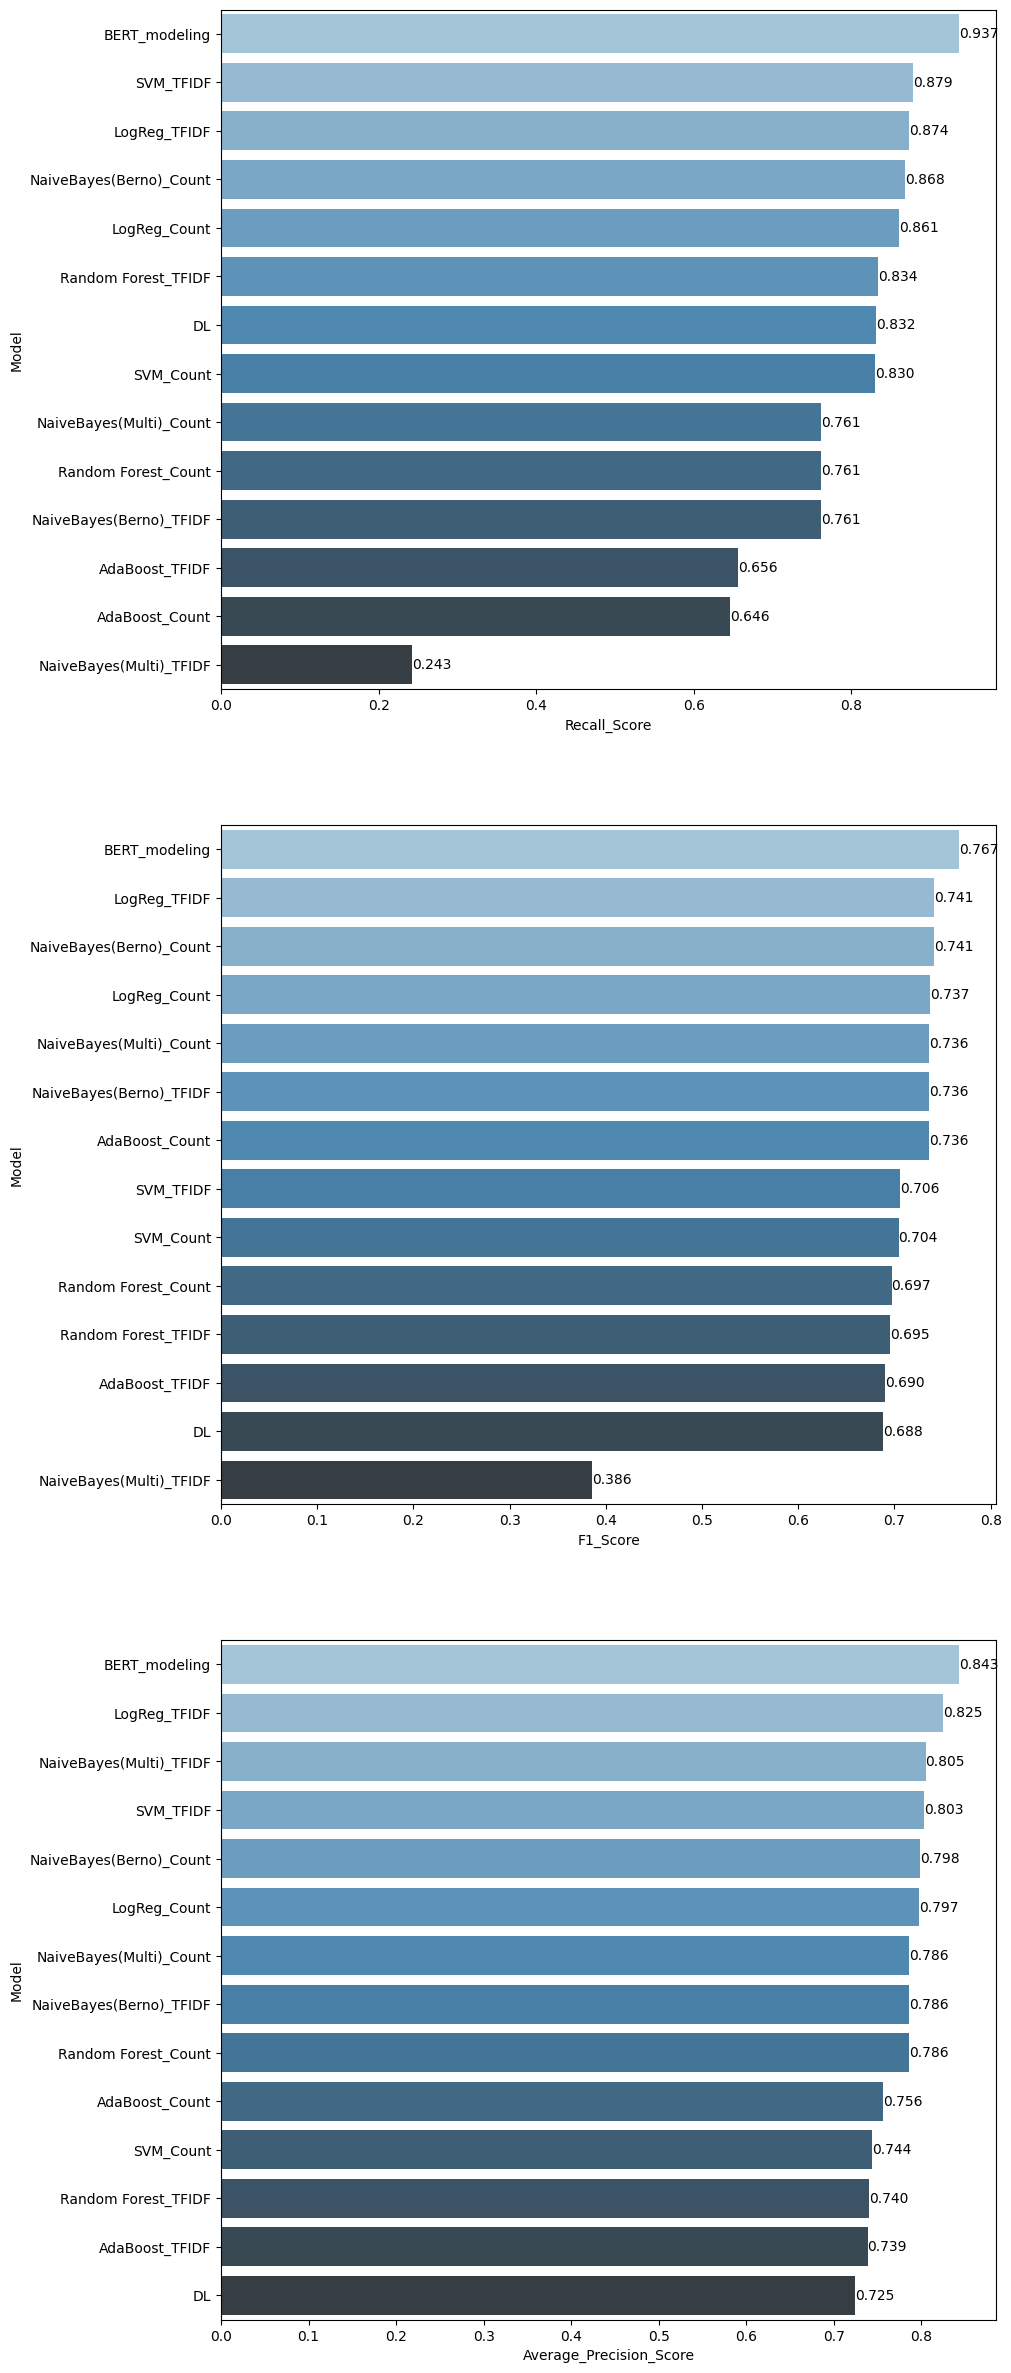

In [229]:
compare = pd.DataFrame({"Model": ["NaiveBayes(Multi)_Count", "NaiveBayes(Berno)_Count", "LogReg_Count", "SVM_Count",
                                  "Random Forest_Count", "AdaBoost_Count", "NaiveBayes(Multi)_TFIDF",
                                  "NaiveBayes(Berno)_TFIDF", "LogReg_TFIDF", "SVM_TFIDF", "Random Forest_TFIDF",
                                  "AdaBoost_TFIDF", "DL" , "BERT_modeling"],

                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1,
                                     nb_ber_count_f1, nb_multi_tf_idf_f1,nb_ber_tf_idf_f1,log_tfidf_f1,
                                     svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_f1],

                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, rf_count_rec,nb_ber_count_rec,
                                         ada_count_rec, nb_multi_tf_idf_rec,nb_ber_tf_idf_rec,log_tfidf_rec,
                                         svc_tfidf_rec, rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_rec],

                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                    nb_ber_count_AP, ada_AP_count, nb_multi_tf_idf_AP,nb_ber_tf_idf_AP,
                                                    log_AP_tfidf, svc_AP_tfidf, rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_AP]})



plt.figure(figsize=(10,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

In this project I have used sentiment analysis to determine whether the product is recommended or not. I have built models with five different machine learning algorithms and also with deep learning algorithm and BERT, then compare their performance. Thus, I have determined the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.

When the scores are examined in the Compare section, it is seen that the scores are generally close to each other, but the BERT then Logistic Regression models are stand out.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___